## Regressão Linear em R

In [1]:
# Simple Linear Regression

# Importing the dataset
dataset = read.csv('Salary_Data.csv')


In [2]:
dataset

YearsExperience,Salary
1.1,39343
1.3,46205
1.5,37731
2.0,43525
2.2,39891
2.9,56642
3.0,60150
3.2,54445
3.2,64445
3.7,57189


In [3]:
# Splitting the dataset into the Training set and Test set
# install.packages('caTools')
library(caTools)
set.seed(123)
split = sample.split(dataset$Salary, SplitRatio = 2/3)


In [4]:
training_set = subset(dataset, split == TRUE)
test_set = subset(dataset, split == FALSE)


In [5]:
training_set

,YearsExperience,Salary
1,1.1,39343
3,1.5,37731
6,2.9,56642
7,3.0,60150
9,3.2,64445
10,3.7,57189
12,4.0,55794
13,4.0,56957
14,4.1,57081
15,4.5,61111


In [6]:
test_set

,YearsExperience,Salary
2,1.3,46205
4,2.0,43525
5,2.2,39891
8,3.2,54445
11,3.9,63218
16,4.9,67938
20,6.0,93940
21,6.8,91738
24,8.2,113812
26,9.0,105582


In [7]:
#fitting linear regression
regressor  = lm(formula = Salary ~ YearsExperience,data = training_set)

In [9]:
summary(regressor)



Call:
lm(formula = Salary ~ YearsExperience, data = training_set)

Residuals:
    Min      1Q  Median      3Q     Max 
-7325.1 -3814.4   427.7  3559.7  8884.6 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)        25592       2646   9.672 1.49e-08 ***
YearsExperience     9365        421  22.245 1.52e-14 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5391 on 18 degrees of freedom
Multiple R-squared:  0.9649,	Adjusted R-squared:  0.963 
F-statistic: 494.8 on 1 and 18 DF,  p-value: 1.524e-14


In [11]:
# Prevendo os resultados do conjunto TEST
y_pred = predict(regressor,newdata = test_set)

In [12]:
#os valores de salário que previstos 
y_pred

2         4         5         8        11        16        20        21 
 37766.77  44322.33  46195.35  55560.43  62115.99  71481.07  81782.66  89274.72 
       24        26 
102385.84 109877.90

In [13]:
test_set #alguns pertos e outros meio longe

,YearsExperience,Salary
2,1.3,46205
4,2.0,43525
5,2.2,39891
8,3.2,54445
11,3.9,63218
16,4.9,67938
20,6.0,93940
21,6.8,91738
24,8.2,113812
26,9.0,105582


## Visualizando os Resultados

In [14]:
#nao executar duas vezes
install.packages('ggplot2')

Installing package into ‘/home/arnaldonot/R/i686-pc-linux-gnu-library/3.4’
(as ‘lib’ is unspecified)
also installing the dependencies ‘colorspace’, ‘assertthat’, ‘utf8’, ‘Rcpp’, ‘RColorBrewer’, ‘dichromat’, ‘munsell’, ‘labeling’, ‘viridisLite’, ‘cli’, ‘pillar’, ‘rlang’, ‘gtable’, ‘plyr’, ‘reshape2’, ‘scales’, ‘tibble’, ‘lazyeval’



In [15]:
library(ggplot2)

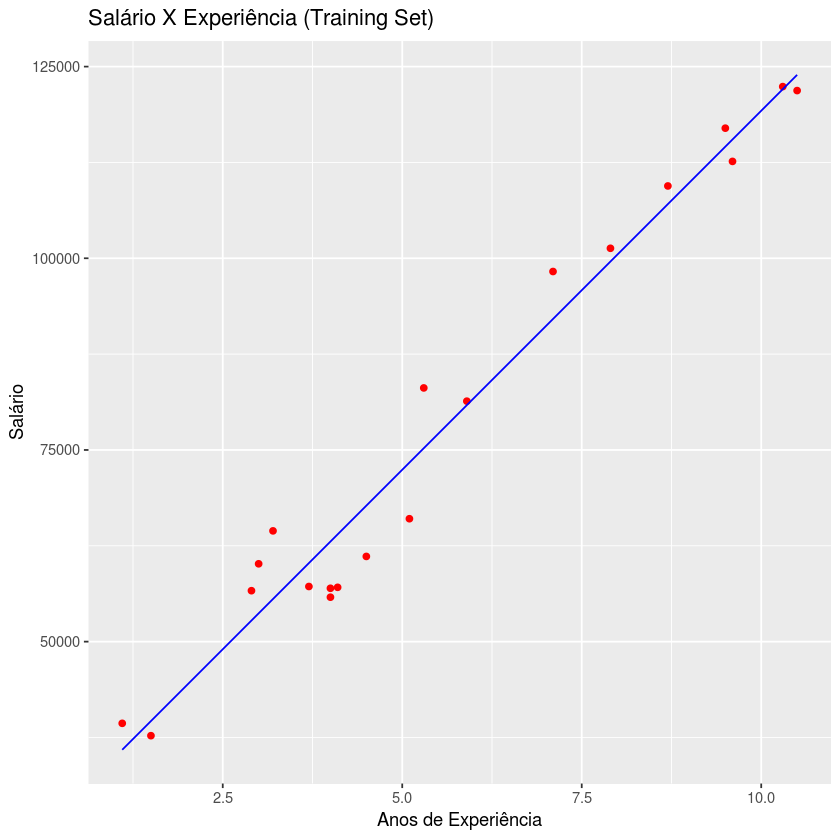

In [17]:
ggplot() + 
    geom_point(aes(x =  training_set$YearsExperience,y = training_set$Salary),colour = 'red') + 
    geom_line(aes( x = training_set$YearsExperience,y =predict(regressor, newdata = training_set)),colour = 'blue')+
ggtitle('Salário X Experiência (Training Set)') + 
xlab('Anos de Experiência') +
ylab('Salário')

OBS -  No Rstudio é possível visualizar mais informações quando dar um zoom.

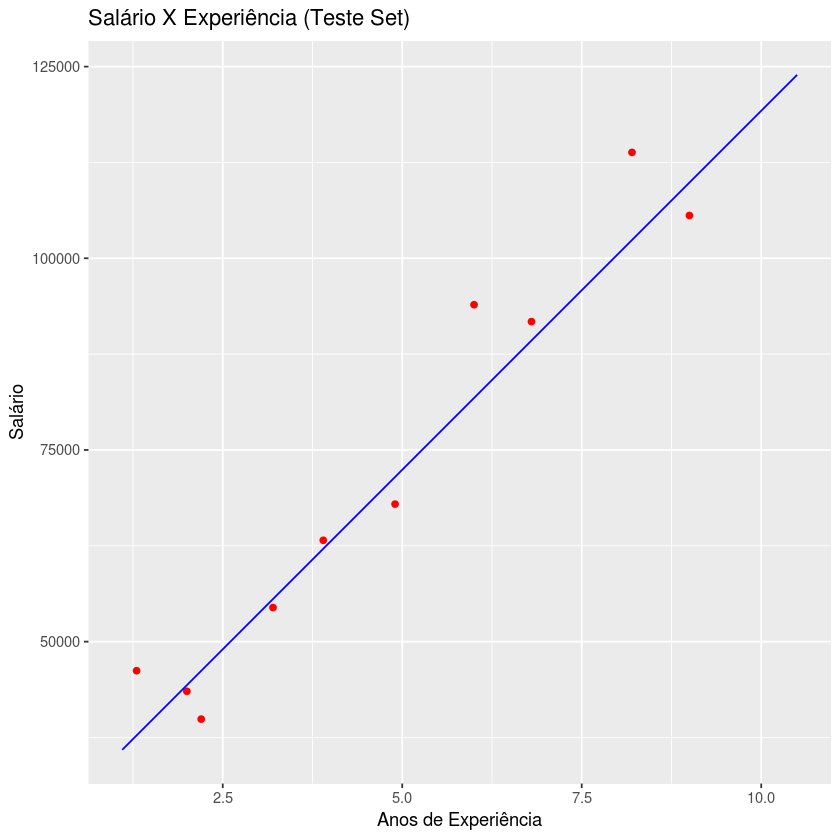

In [19]:
#agora visualizar para a base de dados de teste
ggplot() + 
    geom_point(aes(x =  test_set$YearsExperience,y = test_set$Salary),colour = 'red') + 
    geom_line(aes( x = training_set$YearsExperience,y =predict(regressor, newdata = training_set)),colour = 'blue')+
ggtitle('Salário X Experiência (Teste Set)') + 
xlab('Anos de Experiência') +
ylab('Salário')